**Homework 4**

(1): 
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use random.seed(1), prior to starting part (a) to ensure consistent results. (**3 pts**)

In [86]:
%matplotlib inline
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

(a) Using the random.normal() function, create a vector, $x$, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, $X$.

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
  0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
 -0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555 -0.88762896
 -0.74715829  1.6924546   0.05080775 -0.63699565  0.19091548  2.10025514
  0.12015895  0.61720311  0.30017032 -0.35224985 -1.1425182  -0.34934272
 -0.20889423  0.58662319  0.83898341  0.93110208  0.28558733  0.88514116
 -0.75439794  1.25286816  0.51292982 -0.29809284  0.48851815 -0.07557171
  1.13162939  1.51981682  2.18557541 -1.39649634 -1.44411381 -0.50446586
  0.16003707  0.87616892  0.31563495 -2.02220122 -0.30620401  0.82797464
  0.23009474  0.76201118 -0.22232814 -0.20075807  0.1

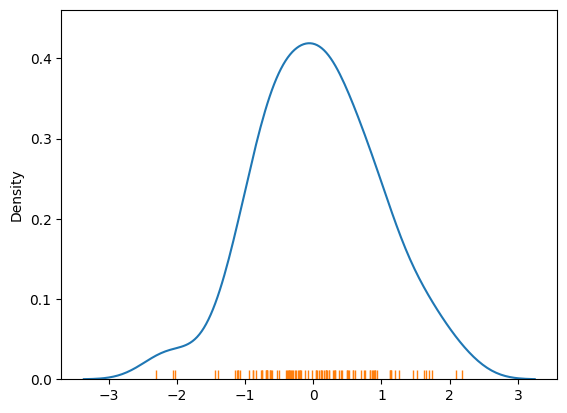

In [87]:
x = np.random.normal(0,1,100)
sns.kdeplot(x)
sns.rugplot(x)
print(x)

(b) Using the random.normal() function, create a vector, $eps$, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

[-0.22356428  0.61225385  0.20174582  0.29678926 -0.54745592  0.08469122
  0.37027823 -0.4768503  -0.13310925  0.01630727 -0.68655866  0.1575797
  0.42308032 -0.42975797  0.17527299 -0.65614171 -0.01934775 -0.80788618
  0.56070885  0.20445027 -0.01230848 -0.38758081  0.63687797  0.98355087
 -0.92899093  0.61808202  0.81382538  0.16900585 -0.59963402  0.43167266
 -0.09046015 -0.30196031 -0.61502907  0.27526875  0.39640343 -0.31176536
  0.26028817 -0.57217069  0.40093052  0.02328365 -0.09328489 -0.05087294
  0.43444308  0.37520582  0.26473266  0.0688506   0.03891056  0.30919013
  0.11624728  0.3412757  -0.15505839 -1.21741888  0.5194123   1.09348982
  0.22068222 -0.05007762 -0.06822237 -0.05952709  0.0087047  -0.56100936
 -0.25854723 -0.49851341  0.12439958 -0.14832058  0.24760566 -0.08735158
  0.49316759  0.10676695  1.09534986 -0.94818046 -0.32345834  0.45074345
  1.26416285 -0.12431739  0.0218345  -0.11315712  0.66572856 -0.14365393
  0.34003492 -0.1599008  -0.63627938  0.15677386  0.

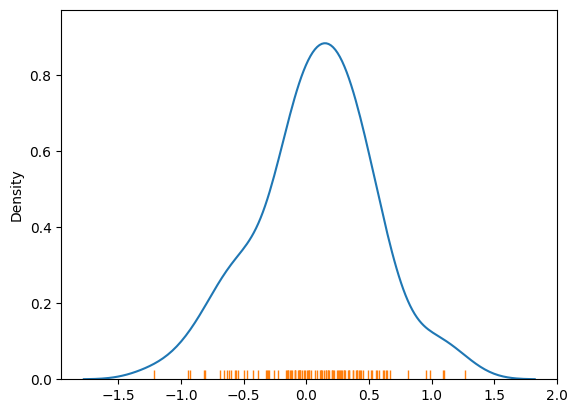

In [88]:
eps = np.random.normal(0,0.5,100)
sns.kdeplot(eps)
sns.rugplot(eps)
print(eps)

(c) Using $x$ and $eps$, generate a vector $y$ according to the model

$Y = −1 + 0.5X + \epsilon$ (3.39)

What is the length of the vector $y$? What are the values of $\beta_0$
and $\beta_1$ in this linear model?

In [89]:
y = -1+0.5*x+eps
print(y)
print(len(y))

[-0.4113916  -0.69362435 -1.06234006 -1.23969505 -1.11475211 -2.06607813
  0.24268411 -1.85745375 -0.9735897  -1.10837791 -0.95550469 -1.87249066
 -0.73812828 -1.62178515 -0.25784229 -2.20608734 -1.10556186 -2.24681539
 -0.41818427 -0.50414212 -1.56261807 -0.81521895  0.08767333  0.23479804
 -1.47856296 -0.72378191 -0.24761974 -1.29887887 -1.73357806 -0.30314961
 -1.43629053 -1.50033708 -1.95861542 -1.14733407 -0.93921963 -1.31809766
 -1.29836701 -1.45496285  0.2308316  -0.60569427 -1.18920266 -1.49468742
 -0.93913607  0.22143312 -0.70986346 -1.24964722 -0.86563169  0.3593177
 -0.82367324 -0.35012274 -1.00497323 -2.39354381 -1.0518468  -0.08118154
 -0.88376489 -0.75676602 -0.64873067 -0.59397605 -0.84850163 -1.11843878
 -1.6357462  -0.87207934 -0.61913551 -1.29736699 -0.50813526 -1.12513744
  0.05898229 -0.13332464  1.18813757 -2.64642863 -2.04551525 -0.80148949
  0.34418139 -0.68623293 -0.82034803 -2.12425773 -0.48737345 -0.72966661
 -0.54491771 -0.77889521 -1.74744345 -0.94360517 -0.

$\textbf{Answer}$: the length of vector $y$ is 100, and $\beta_{0}=-1, \beta_{1}=0.5$ in this linear model.

(d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

$\textbf{Answer:}$ As we can see in the figure those points are represented as (x,y), the distribution of x and y is close to linear

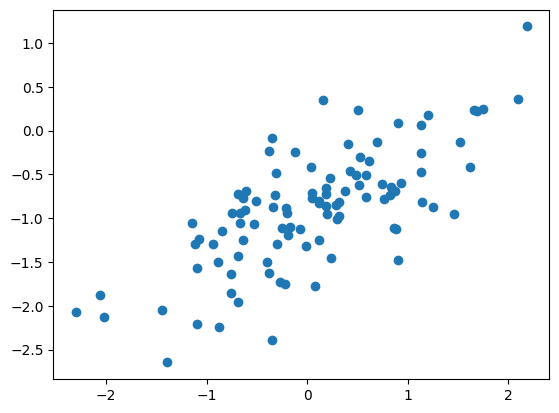

In [90]:
plt.scatter(x,y)
plt.show()

Conclusion: Y is close to linear with X.

(e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta_0}$ and
$\hat{\beta_1}$ compare to $\beta_0$ and
$\beta_1$?

$\textbf{Answer:}$ As we can see in the table, the coefficients $\hat{\beta_0}= -0.9265$ and $\hat{\beta_1}=0.5477$ are quite similar to the original ones  $\beta_0$ and $\beta_1$.

The $\textbf{R-squared}=0.522$ shows that our model didn't fit the data quiet well.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           2.20e-17
Time:                        09:19:33   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.0

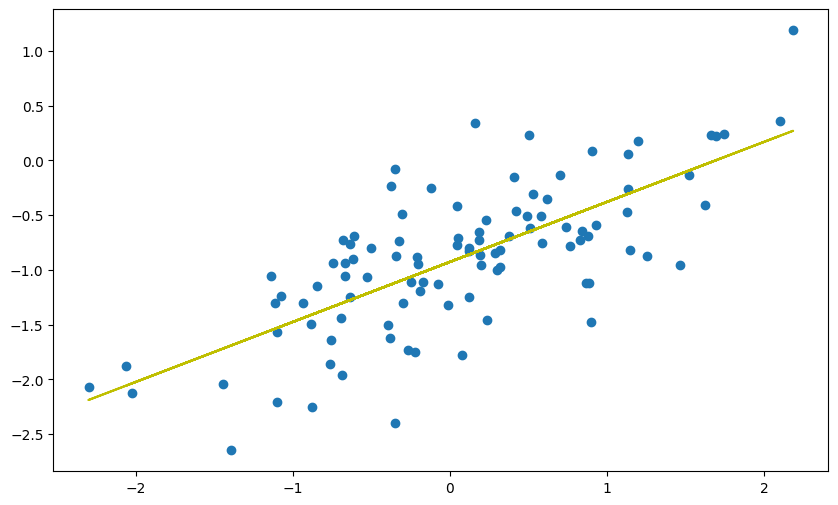

In [91]:
model = smf.ols(formula='y~x',data=pd.DataFrame({'x':x, 'y':y}))
result = model.fit()
print(result.summary())
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,result.fittedvalues,'y')
plt.show()

(f) Repeat (a)–(e) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term in (b). Describe your results.

$\textbf{Answer}:$ Decreasing the varianse results in an $\textbf{Rsquared}=0.956$ that fits the data very well 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2141.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           2.13e-68
Time:                        09:19:33   Log-Likelihood:                 82.261
No. Observations:                 100   AIC:                            -160.5
Df Residuals:                      98   BIC:                            -155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0020      0.011    -93.314      0.0

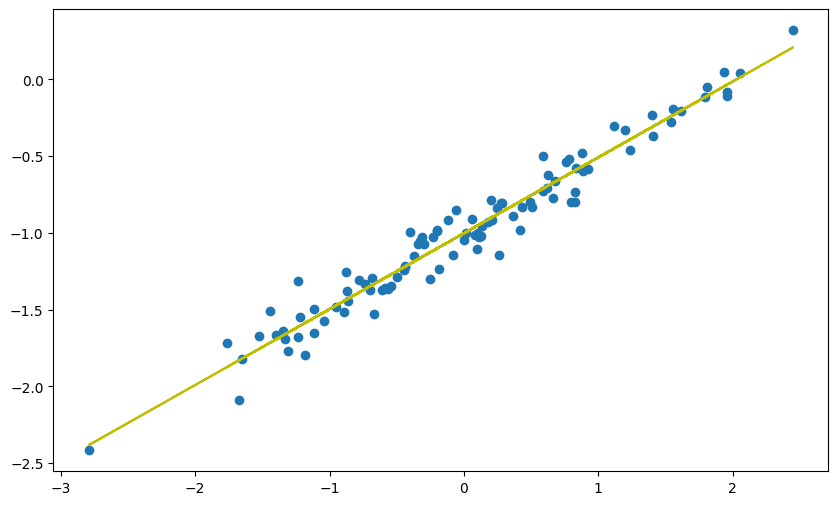

In [92]:
x1 = np.random.normal(0, 1, 100)
eps1 = np.random.normal(0, 0.1, 100)
y1 = -1 + 0.5 * x1 + eps1
model1 = smf.ols(formula='y ~ x', data=pd.DataFrame({'x': x1, 'y': y1}))
result1 = model1.fit()
print(result1.summary())
plt.figure(figsize=(10,6))
plt.scatter(x1, y1)
plt.plot(x1, result1.fittedvalues, 'y')
plt.show()

(g) Repeat (a)–(e) after modifying the data generation process in such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term in (b). Describe your results

$\textbf{Answer}:$ Increasing the variance results in a very bad $\textbf{Rsquared}$ that does not fit the data well.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     33.96
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           7.19e-08
Time:                        09:19:33   Log-Likelihood:                -145.66
No. Observations:                 100   AIC:                             295.3
Df Residuals:                      98   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8802      0.105     -8.375      0.0

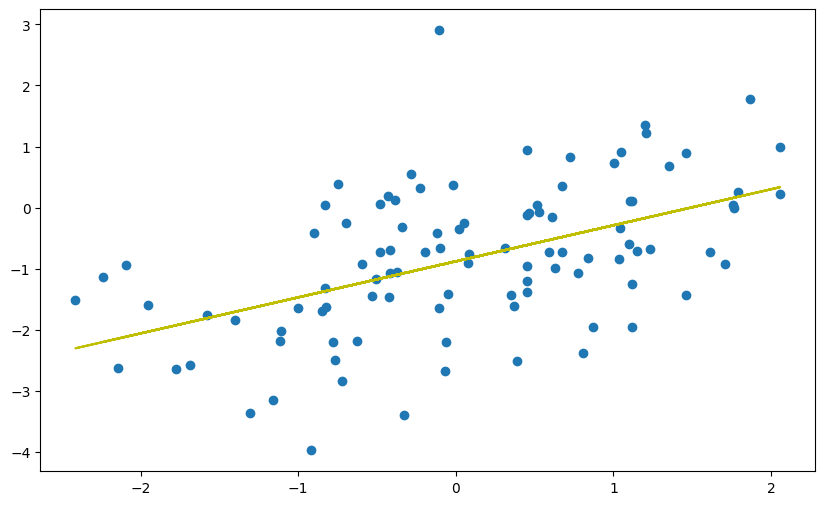

In [93]:
x2 = np.random.normal(0, 1, 100)
eps2 = np.random.normal(0, 1, 100)
y2 = -1 + 0.5 * x2 + eps2
model2 = smf.ols(formula='y ~ x', data=pd.DataFrame({'x': x2, 'y': y2}))
result2 = model2.fit()
print(result2.summary())
plt.figure(figsize=(10,6))
plt.scatter(x2, y2)
plt.plot(x2, result2.fittedvalues, 'y')
plt.show()

(2): In this exercise, you will implement KNN algorithm and compute Root Mean Square Error (RMSE) for different $k$ values in (a) and (b). The first steps are already completed. (**2 pts**)

In [94]:
import pandas as pd
df = pd.read_csv('Train.csv')

Impute missing values

In [95]:
df.isnull().sum()
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() 
df['Outlet_Size'].fillna(mode[0], inplace =True)

Change Categorical variables to dummy variables

In [96]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

Split train and test data

In [97]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

Scale the features

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [99]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

(a) Implement KNN regression and compute the RMSE for a range of values of $k$ from 1 to 25. You may first fit the regression model into train set, i.e., x_train, y_train, and then make predictions on the test set using x_test. Finally, the RMSE between actual y_test and predictions can be calculated.  

In [100]:
RMSE_Values = [] 
for k in range(25):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    # Fit, then predict, then calculate error
    model.fit(x_train, y_train) 
    prediction=model.predict(x_test) 
    error_calculate = sqrt(mean_squared_error(y_test,prediction)) 
    RMSE_Values.append(error_calculate) 
    print('RMSE value for k= ' , k , 'is:', error_calculate)

RMSE value for k=  1 is: 1560.4361234661199
RMSE value for k=  2 is: 1344.7075557147007
RMSE value for k=  3 is: 1270.880264579804
RMSE value for k=  4 is: 1250.9599942872057
RMSE value for k=  5 is: 1239.212293720129
RMSE value for k=  6 is: 1239.4790417728113
RMSE value for k=  7 is: 1228.8867587950842
RMSE value for k=  8 is: 1222.4224429218473
RMSE value for k=  9 is: 1218.241255391087
RMSE value for k=  10 is: 1220.8998748788642
RMSE value for k=  11 is: 1224.9116871403605
RMSE value for k=  12 is: 1226.227077058876
RMSE value for k=  13 is: 1223.9079948456908
RMSE value for k=  14 is: 1229.5397536570138
RMSE value for k=  15 is: 1234.9371440084233
RMSE value for k=  16 is: 1243.591647485799
RMSE value for k=  17 is: 1250.9007022209569
RMSE value for k=  18 is: 1259.9199041411907
RMSE value for k=  19 is: 1267.0381790728618
RMSE value for k=  20 is: 1272.0755868023343
RMSE value for k=  21 is: 1278.9647490411685
RMSE value for k=  22 is: 1283.4485448788148
RMSE value for k=  23 is

(b) Plot the RMSE values against $k$ values.

<AxesSubplot:>

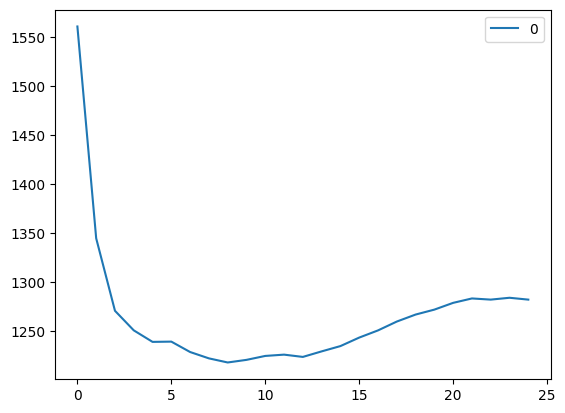

In [101]:
curve = pd.DataFrame(RMSE_Values) 
curve.plot()